# House Price Prediction

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know the following things about the prospective properties:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### 1. Data Understanding, Preparation and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

summary of the dataset: 1460 rows, 81 columns, and multiple fields with null values

In [4]:
#check few reords
housing.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#check the missing percentage
missing_percent = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
missing_percent.head(30)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64


After Looking at the column information details we can see that most of the null values in the columns are representing no availability in the house instead of having the null values itself. for example, "No Pool" "No Fence", "No Fireplace" etc is reprsented as the NA in the provided CSV.


In [6]:
# drop values with greater than 80% similar values as it is a skewed reprsentation. We can also drop FireplaceQu as Fireplaces 
# column can fill in for the variance with the fireplaces in the housing prices.

housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [7]:
#check numarical columns
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Treat missing values by imputing for columns with further missing values


In [8]:
#Presence of outlier hence imputing the missing values through median
housing['LotFrontage']= housing['LotFrontage'].fillna(housing['LotFrontage'].median()) 

In [9]:
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [10]:
housing['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [11]:
# using mean for imputation as no outlier presence
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean()) 

In [12]:
#check the missing percentage
missing_percent = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
missing_percent.head(30)

GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
TotRmsAbvGrd     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
GrLivArea        0.000000
KitchenQual      0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
Id               0.000000
Functional       0.000000
1stFlrSF         0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
dtype: float64

In [13]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
# using mean for imputation as no outlier presence
housing['MasVnrArea']= housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

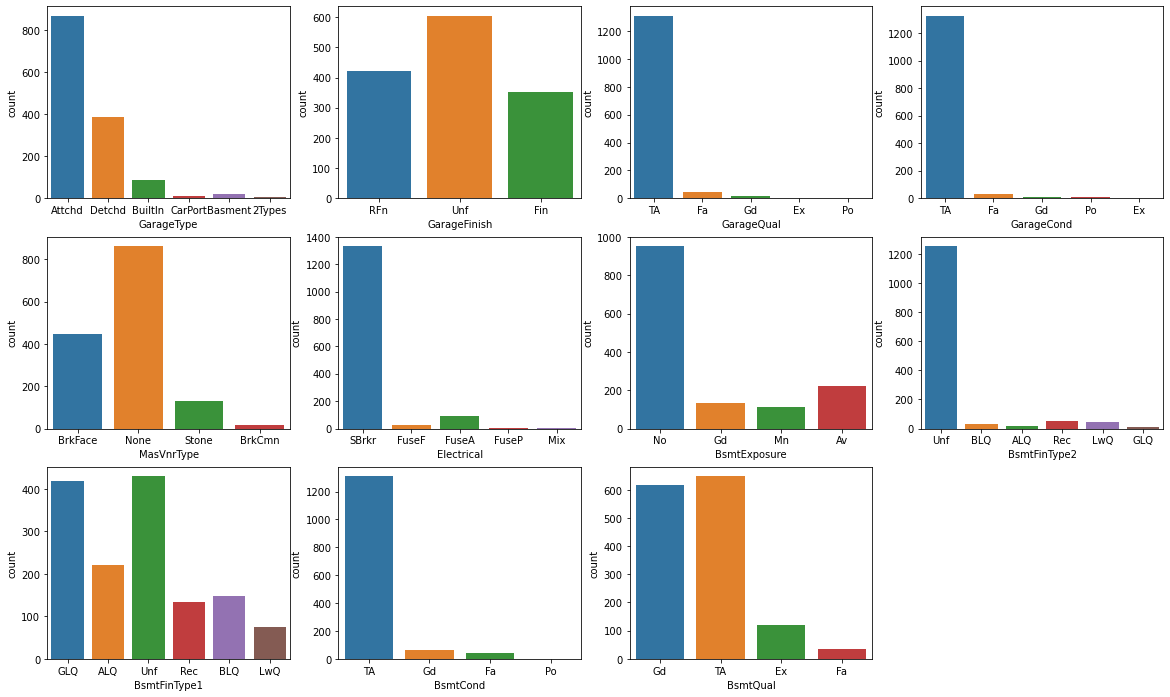

In [15]:
#Visualising the variables wih missing values
plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(3,4,2)
sns.countplot(x = 'GarageFinish',  data = housing)
plt.subplot(3,4,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(3,4,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(3,4,5)
sns.countplot(x = 'MasVnrType', data = housing)
plt.subplot(3,4,6)
sns.countplot(x = 'Electrical', data = housing)
plt.subplot(3,4,7)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(3,4,8)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(3,4,9)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(3,4,10)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(3,4,11)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.show()

In [16]:
# replacing null with No Garrage where the house doesn't have the garrage

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

# Cases when the house doesn't have the basement so replacing null with No Basement
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')

In [17]:
#check the missing percentage
missing_percent = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
missing_percent.head(30)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
dtype: float64

All the missing values are taken care of.

In [18]:
#changing numerical values to the provided categorical. this will help to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})



In [19]:
#changing numerical values to the provided categorical. this will help to form these as dummy variables 
housing['OverallQual']=housing['OverallQual'].replace({
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [20]:
#changing numerical values to the provided categorical. this will help to form these as dummy variables 
housing['OverallCond']=housing['OverallCond'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})

In [21]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
#Let's check the dependent variable
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

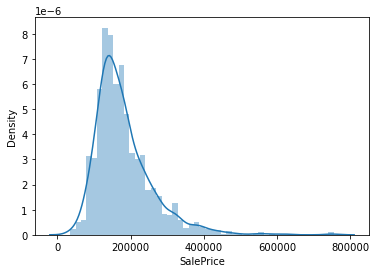

In [23]:
sns.distplot(housing['SalePrice']) # skewed
plt.show()

In [24]:
# using log transformation to handle the skewedness
housing['SalePrice']= np.log(housing['SalePrice']) #tranforming to form normal disribution

In [25]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

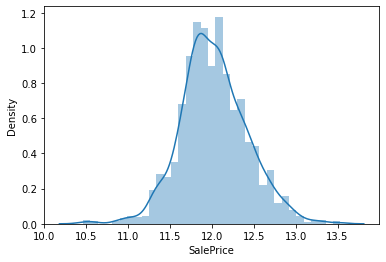

In [26]:
sns.distplot(housing['SalePrice']) # skewed
plt.show()

After the log transformation we can see that the dependent variable SalePrice is normally distributed.

EDA: With all the categorical columns and their effect on the SalePrice

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [28]:
import sweetviz as sv
sweet_report = sv.analyze(housing)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
#after going through the detailed sweetviz reports, we shall drop all the skewed columns. 
#also validate it with the skew command. 
housing.skew()

Id                0.000000
LotFrontage       2.409147
LotArea          12.207688
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         0.121335
dtype: float64

In [30]:
housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others') # 1% and less than to Others
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others') # 1% and less than to Others 
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others') #2% and less than to Others category
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

In [31]:
# Dropping highly skewed column 
housing.drop(['Functional','GarageQual','GarageCond','SaleType','CentralAir','Heating','ExterCond', 'RoofMatl',
             'Utilities','Street','Condition1','Condition2', 'LandSlope','LandContour','Electrical',
             'BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)  

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

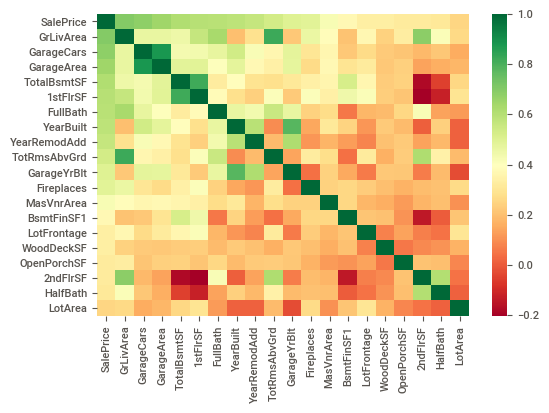

In [33]:
#correlation matrix with the sales price
corr_matrix = housing.corr()
n = 20 #no of variables for heatmap
cols = corr_matrix.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.heatmap(cm,  yticklabels=cols.values, xticklabels=cols.values, cmap = 'RdYlGn')
plt.show()

Coorelation matrix gives us a good visibility on the important variables.

In [34]:
# YearRemodAdd has come out as an important feature in corr. let us convert in to the duration since remodeling  
housing['Remodel_Years'] = 2021 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt']) 

In [35]:
housing['HouseBuilt_Years'] = 2021 - housing['YearBuilt']
housing['GarageBuilt_Years'] = 2021 - housing['GarageYrBlt']

In [36]:
#we have converted the columns so drop the original columns 
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True) 

In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   object 
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   LotShape           1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   BldgType           1460 non-null   object 
 9   HouseStyle         1460 non-null   object 
 10  OverallQual        1460 non-null   object 
 11  OverallCond        1460 non-null   object 
 12  RoofStyle          1460 non-null   object 
 13  Exterior1st        1460 non-null   object 
 14  Exterior2nd        1460 non-null   object 
 15  MasVnrType         1460 non-null   object 
 16  MasVnrArea         1460 

In [38]:
# fetch all the categorical columns to form dummy variables
category_col = housing.select_dtypes(include=['object'])
category_col.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [39]:
# create dummy variables
category_col = pd.get_dummies(category_col, drop_first=True)  
print(category_col.shape)

(1460, 130)


In [40]:
# merge dummy variables with the housing master data
housing = pd.concat([housing, category_col], axis=1) 
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,1,0,1,0,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,1,0,0,0,0,1,0,0,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,0,1,0,1,0,0


In [41]:
#drop columns after merging dummy variables
housing.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition', 'Id'],axis=1,inplace=True) 

In [42]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


### 2. Creating the train and test data with standardization 

In [43]:
# Add all feature variable to X
X = housing.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [44]:
# Add response variable to y
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [45]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_No Garage',
       'GarageType_Others', 'GarageFinish_No Garage', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=163)

In [46]:
# devide the overall data in to test and train data sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### 3. Model Building and Evaluation with Advance Regression with Ridge and Lasso 


### Ridge Regression

In [47]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [49]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.75365803e-03  1.51972271e-02  1.31543970e-03  8.93102634e-04
  2.34743942e-03  6.91478480e-03  8.75632075e-03  2.88692564e-02
  2.75831501e-02 -2.56553575e-03  4.39152181e-02  2.07351769e-02
  3.17242222e-03  2.78009065e-02  1.95950739e-02  6.56611020e-03
 -1.65345872e-02  2.11407570e-02  2.29905625e-02  2.77812381e-02
  1.27154335e-02  1.12036455e-02 -2.17776376e-03  7.14904513e-03
  5.68550183e-03  1.08527051e-02 -1.17014693e-02 -1.87271587e-03
  3.16781811e-04 -7.90948305e-03 -2.32666197e-02 -2.44877311e-02
 -1.24082152e-03  3.16793561e-03 -1.94591324e-02  1.31354049e-02
 -3.71571957e-03 -1.38935364e-03 -1.51925894e-03  6.87769679e-03
  6.73104424e-03 -3.48886286e-03 -1.22383968e-02  1.85352177e-03
 -4.58169572e-03  1.90033445e-03 -1.28935776e-03 -1.25460544e-02
 -8.17001452e-04 -9.22691795e-03  4.10384575e-03 -7.24850180e-03
  4.58923846e-03  9.37486345e-03 -7.96170099e-03 -3.74139148e-03
 -1.82722856e-03 -5.16601820e-04 -5.62391518e-03  2.80345834e-03
  1.03355907e-02  1.03346

In [50]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9170513267339636
0.8828531955759495
13.31261856822597
8.442602796657962
0.013038803690720833
0.019275348850817265


In [51]:
ridge.score(X_train,y_train)

0.9170513267339636

In [52]:
ridge.score(X_test,y_test)

0.8828531955759495

In [53]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('LotFrontage', -0.026),
 ('LotArea', -0.024),
 ('MasVnrArea', -0.023),
 ('BsmtFinSF1', -0.022),
 ('BsmtFinSF2', -0.022),
 ('BsmtUnfSF', -0.021),
 ('TotalBsmtSF', -0.02),
 ('1stFlrSF', -0.02),
 ('2ndFlrSF', -0.019),
 ('LowQualFinSF', -0.019),
 ('GrLivArea', -0.019),
 ('BsmtFullBath', -0.018),
 ('BsmtHalfBath', -0.018),
 ('FullBath', -0.017),
 ('HalfBath', -0.017),
 ('BedroomAbvGr', -0.016),
 ('KitchenAbvGr', -0.016),
 ('TotRmsAbvGrd', -0.015),
 ('Fireplaces', -0.014),
 ('GarageCars', -0.013),
 ('GarageArea', -0.013),
 ('WoodDeckSF', -0.012),
 ('OpenPorchSF', -0.012),
 ('EnclosedPorch', -0.012),
 ('3SsnPorch', -0.012),
 ('ScreenPorch', -0.012),
 ('PoolArea', -0.011),
 ('MiscVal', -0.011),
 ('MoSold', -0.011),
 ('YrSold', -0.011),
 ('Remodel_Years', -0.01),
 ('HouseBuilt_Years', -0.01),
 ('GarageBuilt_Years', -0.01),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.01),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.01),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0

### Lasso Regression

In [54]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [56]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [57]:
lasso.coef_

array([-0.00673635,  0.01568192, -0.        , -0.        ,  0.00075933,
        0.00850527,  0.        ,  0.        ,  0.        , -0.00610857,
        0.10445003,  0.02370114,  0.00258929,  0.0263403 ,  0.01678573,
        0.00294107, -0.01854786,  0.0151885 ,  0.02138555,  0.03926706,
        0.        ,  0.01045651, -0.00180622,  0.00822567,  0.0051942 ,
        0.01089855, -0.01309134, -0.00099801, -0.        , -0.00721266,
       -0.02316089, -0.04168045,  0.        ,  0.00065667, -0.01710081,
        0.02013452, -0.        , -0.00045378, -0.00084221,  0.00457553,
        0.00333141, -0.00878401, -0.01671314,  0.00442891, -0.00363798,
        0.00133605, -0.        , -0.01226901,  0.        , -0.00619275,
        0.00391213, -0.00574788,  0.00465481,  0.00944442, -0.00623614,
       -0.0026932 , -0.        , -0.        , -0.00319348,  0.0016799 ,
        0.01139927,  0.00313196,  0.02431712, -0.01983312,  0.00164938,
       -0.014554  , -0.01599508, -0.00206484, -0.00226691, -0.00

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9182039713251695
0.8802543822597108
13.127628053209069
8.629895558757113
0.012857618073662163
0.019702957896705738


In [59]:
lasso.score(X_train,y_train)

0.9182039713251695

In [60]:
lasso.score(X_test,y_test)

0.8802543822597108

In [73]:
# Lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('LotFrontage', -0.039),
 ('LotArea', -0.027),
 ('MasVnrArea', -0.026),
 ('BsmtFinSF1', -0.023),
 ('BsmtFinSF2', -0.021),
 ('BsmtUnfSF', -0.02),
 ('TotalBsmtSF', -0.02),
 ('1stFlrSF', -0.018),
 ('2ndFlrSF', -0.018),
 ('LowQualFinSF', -0.017),
 ('GrLivArea', -0.016),
 ('BsmtFullBath', -0.016),
 ('BsmtHalfBath', -0.016),
 ('FullBath', -0.015),
 ('HalfBath', -0.015),
 ('BedroomAbvGr', -0.014),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', -0.013),
 ('Fireplaces', -0.012),
 ('GarageCars', -0.011),
 ('GarageArea', -0.011),
 ('WoodDeckSF', -0.01),
 ('OpenPorchSF', -0.01),
 ('EnclosedPorch', -0.009),
 ('3SsnPorch', -0.009),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.009),
 ('MiscVal', -0.008),
 ('MoSold', -0.008),
 ('YrSold', -0.007),
 ('Remodel_Years', -0.007),
 ('HouseBuilt_Years', -0.007),
 ('GarageBuilt_Years', -0.007),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.006),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.006),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES',

In [74]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.912909,0.914138
1,R2 Score (Test),0.882860,0.881193
2,RSS (Train),13.977450,13.780216
3,RSS (Test),8.442130,8.562264
4,MSE (Train),0.117004,0.116176
5,MSE (Test),0.138832,0.139816


In [75]:
## Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [76]:
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotFrontage,-0.004065,-0.003047
LotArea,0.014444,0.014249
MasVnrArea,0.003784,0.000000
BsmtFinSF1,0.004715,-0.000000
BsmtFinSF2,0.003152,0.000000
BsmtUnfSF,0.006322,0.003827
TotalBsmtSF,0.012429,0.002303
1stFlrSF,0.028026,0.007745
2ndFlrSF,0.022166,0.000000
LowQualFinSF,-0.002348,-0.004680


## Conclusion :

Both Ridge and Lasso regression are able to perform well on the provided data. Top variables are also looking similar.

* Ridge Regression : Train :91.70 Test :88.28 Optimal Value of alpha: 100
* Lasso Regression: Train :91.82 Test :88.02 Optimal Value of alpha: 0.001

As per the model building exercise, The 5 most important features are:

1. SaleCondition_Partial
2. SaleCondition_Others
3. SaleCondition_Normal
4. GarageFinish_Unf
5. GarageFinish_RFn

##### Question 1 Work
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [77]:
#Fitting Ridge model for alpha = 100*2(double) and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.06459256e-03  1.44442023e-02  3.78378505e-03  4.71546536e-03
  3.15168301e-03  6.32243437e-03  1.24293380e-02  2.80261356e-02
  2.21661371e-02 -2.34794649e-03  3.88150457e-02  1.83431594e-02
  2.66229164e-03  2.57719623e-02  1.81772933e-02  7.58284132e-03
 -1.37073688e-02  2.23017922e-02  2.39496074e-02  2.50814256e-02
  1.54167859e-02  1.10460265e-02 -9.35271643e-04  5.44997507e-03
  5.52601891e-03  1.01391070e-02 -1.06462619e-02 -1.78420527e-03
  5.40074644e-04 -6.95582894e-03 -2.30852152e-02 -1.97876674e-02
 -3.73552179e-03  2.76877759e-03 -1.93779743e-02  1.12930935e-02
 -2.93264957e-03 -1.21273383e-03 -2.18919533e-03  6.49325081e-03
  7.27109535e-03 -6.05230579e-04 -1.05359508e-02  4.69655095e-04
 -4.95330190e-03  7.99615449e-04 -1.41451510e-03 -1.18218294e-02
  1.97979692e-03 -9.51227363e-03  3.92631127e-03 -8.17491191e-03
  2.93350244e-03  9.30092644e-03 -7.06070965e-03 -3.05486117e-03
 -1.49172099e-03  1.14932910e-04 -5.29474519e-03  2.41940493e-03
  9.18121172e-03 -1.41390

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.912908875163694
0.8828597518633028
13.977449909355194
8.44213029439709
0.013689960733942403
0.01927427007853217


In [79]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.023),
 ('LotFrontage', -0.023),
 ('LotArea', -0.023),
 ('MasVnrArea', -0.02),
 ('BsmtFinSF1', -0.02),
 ('BsmtFinSF2', -0.02),
 ('BsmtUnfSF', -0.019),
 ('TotalBsmtSF', -0.018),
 ('1stFlrSF', -0.018),
 ('2ndFlrSF', -0.017),
 ('LowQualFinSF', -0.016),
 ('GrLivArea', -0.016),
 ('BsmtFullBath', -0.015),
 ('BsmtHalfBath', -0.015),
 ('FullBath', -0.014),
 ('HalfBath', -0.014),
 ('BedroomAbvGr', -0.014),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', -0.014),
 ('Fireplaces', -0.013),
 ('GarageCars', -0.012),
 ('GarageArea', -0.011),
 ('WoodDeckSF', -0.011),
 ('OpenPorchSF', -0.011),
 ('EnclosedPorch', -0.011),
 ('3SsnPorch', -0.011),
 ('ScreenPorch', -0.011),
 ('PoolArea', -0.01),
 ('MiscVal', -0.01),
 ('MoSold', -0.01),
 ('YrSold', -0.01),
 ('Remodel_Years', -0.009),
 ('HouseBuilt_Years', -0.009),
 ('GarageBuilt_Years', -0.009),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.009),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.008),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0

In [80]:
#Fitting Lasso model for alpha = 0.001*2(double) and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [81]:
lasso.coef_

array([-0.00304727,  0.01424912,  0.        , -0.        ,  0.        ,
        0.00382712,  0.00230337,  0.00774487,  0.        , -0.00468029,
        0.10015419,  0.02293409,  0.0016678 ,  0.02447998,  0.01467585,
        0.00099897, -0.01552534,  0.01590338,  0.02212768,  0.04141326,
        0.        ,  0.0097225 , -0.        ,  0.00619814,  0.0043549 ,
        0.0101012 , -0.01282466, -0.        , -0.        , -0.00555145,
       -0.02551525, -0.03927497, -0.        ,  0.        , -0.01804287,
        0.01884521, -0.        , -0.        , -0.00178763,  0.00214696,
        0.00206339, -0.00341257, -0.01649446,  0.        , -0.00328892,
        0.        , -0.        , -0.01191764,  0.        , -0.00661314,
        0.00312694, -0.00652279,  0.00263416,  0.00915675, -0.00405471,
       -0.00146187, -0.        ,  0.        , -0.00194996,  0.        ,
        0.01008111,  0.        ,  0.0239542 , -0.01970755,  0.        ,
       -0.01385565, -0.0150144 , -0.00068537, -0.00174435, -0.  

In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9141378077745597
0.8811928208029145
13.780215759002502
8.562263633940246
0.01349678330950294
0.019548547109452617


In [84]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('LotFrontage', -0.039),
 ('LotArea', -0.027),
 ('MasVnrArea', -0.026),
 ('BsmtFinSF1', -0.023),
 ('BsmtFinSF2', -0.021),
 ('BsmtUnfSF', -0.02),
 ('TotalBsmtSF', -0.02),
 ('1stFlrSF', -0.018),
 ('2ndFlrSF', -0.018),
 ('LowQualFinSF', -0.017),
 ('GrLivArea', -0.016),
 ('BsmtFullBath', -0.016),
 ('BsmtHalfBath', -0.016),
 ('FullBath', -0.015),
 ('HalfBath', -0.015),
 ('BedroomAbvGr', -0.014),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', -0.013),
 ('Fireplaces', -0.012),
 ('GarageCars', -0.011),
 ('GarageArea', -0.011),
 ('WoodDeckSF', -0.01),
 ('OpenPorchSF', -0.01),
 ('EnclosedPorch', -0.009),
 ('3SsnPorch', -0.009),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.009),
 ('MiscVal', -0.008),
 ('MoSold', -0.008),
 ('YrSold', -0.007),
 ('Remodel_Years', -0.007),
 ('HouseBuilt_Years', -0.007),
 ('GarageBuilt_Years', -0.007),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.006),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.006),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES',

#### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [90]:
# lets drop top 5 predictor variables
X_train.drop(['GarageFinish_RFn','GarageFinish_Unf','SaleCondition_Normal','SaleCondition_Others','SaleCondition_Partial'],axis=1,inplace=True)
X_test.drop(['GarageFinish_RFn','GarageFinish_Unf','SaleCondition_Normal','SaleCondition_Others','SaleCondition_Partial'],axis=1,inplace=True)

In [91]:
#Fitting Lasso model for with ramaining variables alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [92]:
lasso.coef_

array([-0.00585222,  0.0159499 , -0.        , -0.        ,  0.00029472,
        0.00896516,  0.        ,  0.00219626,  0.        , -0.00606995,
        0.10099508,  0.02393358,  0.00213722,  0.02888832,  0.01815328,
        0.0016481 , -0.01923992,  0.01569499,  0.02193557,  0.0396629 ,
        0.00015568,  0.01102254, -0.00175855,  0.0078539 ,  0.00538747,
        0.01036862, -0.01459547, -0.00036481, -0.        , -0.00679913,
       -0.02541514, -0.04263717,  0.        ,  0.00056385, -0.01762059,
        0.02052773, -0.0016671 , -0.00016474, -0.        ,  0.00497318,
        0.00360231, -0.00696831, -0.01941679,  0.00356239, -0.00450586,
        0.0020481 , -0.        , -0.01366262,  0.        , -0.00539931,
        0.00379736, -0.00597735,  0.00449837,  0.0086463 , -0.00639282,
       -0.00262683, -0.        ,  0.        , -0.00395412,  0.00134981,
        0.01035481,  0.00218059,  0.02291433, -0.02048049,  0.00187622,
       -0.01467293, -0.01611262, -0.00280526, -0.00299049, -0.00

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9167576977757798
0.8773688406647953
13.359743738128932
8.837852418177052
0.013084959586806007
0.02017774524697957


In [94]:
# Lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('LotFrontage', -0.043),
 ('LotArea', -0.03),
 ('MasVnrArea', -0.028),
 ('BsmtFinSF1', -0.027),
 ('BsmtFinSF2', -0.026),
 ('BsmtUnfSF', -0.025),
 ('TotalBsmtSF', -0.024),
 ('1stFlrSF', -0.024),
 ('2ndFlrSF', -0.023),
 ('LowQualFinSF', -0.02),
 ('GrLivArea', -0.02),
 ('BsmtFullBath', -0.019),
 ('BsmtHalfBath', -0.019),
 ('FullBath', -0.019),
 ('HalfBath', -0.018),
 ('BedroomAbvGr', -0.018),
 ('KitchenAbvGr', -0.018),
 ('TotRmsAbvGrd', -0.016),
 ('Fireplaces', -0.016),
 ('GarageCars', -0.015),
 ('GarageArea', -0.015),
 ('WoodDeckSF', -0.015),
 ('OpenPorchSF', -0.014),
 ('EnclosedPorch', -0.012),
 ('3SsnPorch', -0.011),
 ('ScreenPorch', -0.011),
 ('PoolArea', -0.011),
 ('MiscVal', -0.011),
 ('MoSold', -0.01),
 ('YrSold', -0.01),
 ('Remodel_Years', -0.01),
 ('HouseBuilt_Years', -0.009),
 ('GarageBuilt_Years', -0.008),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.008),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.008),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -